In [1]:
# Correlation between VI and CD8 T cells/parasite
import pandas as pd
import numpy as np
import os
os.chdir("/Users/soumenbera/Documents/killing_Tcells")
data = pd.read_excel('Data_killing_23July2018-curated-final.xlsx') #data path
df = pd.DataFrame(data,columns = ['Time','Background','Tcells','Parasite ID','Intensity'])
#df["Intensity_scale"] = np.log10(df.Intensity)
#df["Intensity_scale1"] = df.Intensity_scale.fillna(df.Intensity_scale.mean())
df["Time_1"] = df.Time/60.0
df["Intensity_scale"] = df.Intensity.fillna(df.Intensity.mean())
df["Background_scale"] = df.Background.fillna(df.Background.mean())
df["VI_Index"] = np.log10(df["Intensity_scale"]/df["Background_scale"])
#df.loc[(df.Intensity_scale1>np.mean(df.Intensity_scale1))|((df.Intensity_scale1<=np.mean(df.Intensity_scale1)))]
from sklearn import preprocessing
#df["time_scaled"] = preprocessing.scale(df.Time.values)
#print (df)
#print (df['Time from T transfer (min)'], df['Parasite ID']==1)
#df["Intensity_scale2"]=df.Intensity_scale>np.mean(df.Intensity_scale1)
print(df)
import sys
print(sys.path)

          Time  Background  Tcells  Parasite ID  Intensity     Time_1  \
0     240.0000        51.2       5            1      170.8   4.000000   
1     241.1589        54.0       5            1      198.3   4.019315   
2     242.3178        53.9       5            1      192.4   4.038630   
3     243.4767        51.9       5            1      192.5   4.057945   
4     244.6356        54.3       5            1      193.7   4.077260   
...        ...         ...     ...          ...        ...        ...   
2114  639.8325        69.7       0           32      151.3  10.663875   
2115  645.2825        70.6       0           32      154.9  10.754708   
2116  650.7325        68.4       0           32      145.0  10.845542   
2117  656.1825        67.7       0           32      154.7  10.936375   
2118  661.6325        70.5       0           32      152.3  11.027208   

      Intensity_scale  Background_scale  VI_Index  
0               170.8              51.2  0.523218  
1               198

In [3]:
df.loc[(df.VI_Index> 0.3)|(df.VI_Index <= 0.3)]
df["VI_Index_1"]=df.VI_Index < 0.3
print(df)

          Time  Background  Tcells  Parasite ID  Intensity     Time_1  \
0     240.0000        51.2       5            1      170.8   4.000000   
1     241.1589        54.0       5            1      198.3   4.019315   
2     242.3178        53.9       5            1      192.4   4.038630   
3     243.4767        51.9       5            1      192.5   4.057945   
4     244.6356        54.3       5            1      193.7   4.077260   
...        ...         ...     ...          ...        ...        ...   
2114  639.8325        69.7       0           32      151.3  10.663875   
2115  645.2825        70.6       0           32      154.9  10.754708   
2116  650.7325        68.4       0           32      145.0  10.845542   
2117  656.1825        67.7       0           32      154.7  10.936375   
2118  661.6325        70.5       0           32      152.3  11.027208   

      Intensity_scale  Background_scale  VI_Index  VI_Index_1  
0               170.8              51.2  0.523218       Fal

In [4]:
import matplotlib.pyplot as plt
j = 1
df2=[]
for i in range(32):
    df1=(df[df['Parasite ID']==j]) # separate the data according to parasite id 
    df2.append(df1)
    j=j+1
#for i in range(len(df['Parasite ID'])):
 #   if df['Parasite ID'][i]==j:
        
    #else: 
      #  j=j+1
        
#import matplotlib.pyplot as plt
#for i in range(len(df['Tcells']))    
#plt.plot(df['Time from T transfer (min)'],df['Tcells'])

In [5]:
print(df2[18])

       Time  Background  Tcells  Parasite ID  Intensity     Time_1  \
1463  480.0        57.1       4           19      174.5   8.000000   
1464  485.0        60.0       4           19      180.7   8.083333   
1465  490.0        61.0       4           19      204.6   8.166667   
1466  495.0        59.1       4           19      171.8   8.250000   
1467  500.0        61.3       4           19      178.4   8.333333   
1468  505.0        61.2       4           19      191.9   8.416667   
1469  510.0        62.0       4           19      187.4   8.500000   
1470  515.0        61.2       4           19      200.5   8.583333   
1471  520.0        59.6       4           19      177.4   8.666667   
1472  525.0        61.4       4           19      177.9   8.750000   
1473  530.0        61.8       3           19      188.8   8.833333   
1474  535.0        62.4       3           19      219.1   8.916667   
1475  540.0        63.0       3           19      139.5   9.000000   
1476  545.0        7

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     44.50
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           9.84e-10
Time:                        22:11:21   Log-Likelihood:                 199.31
No. Observations:                 115   AIC:                            -394.6
Df Residuals:                     113   BIC:                            -389.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6913      0.071      9.671      0.0

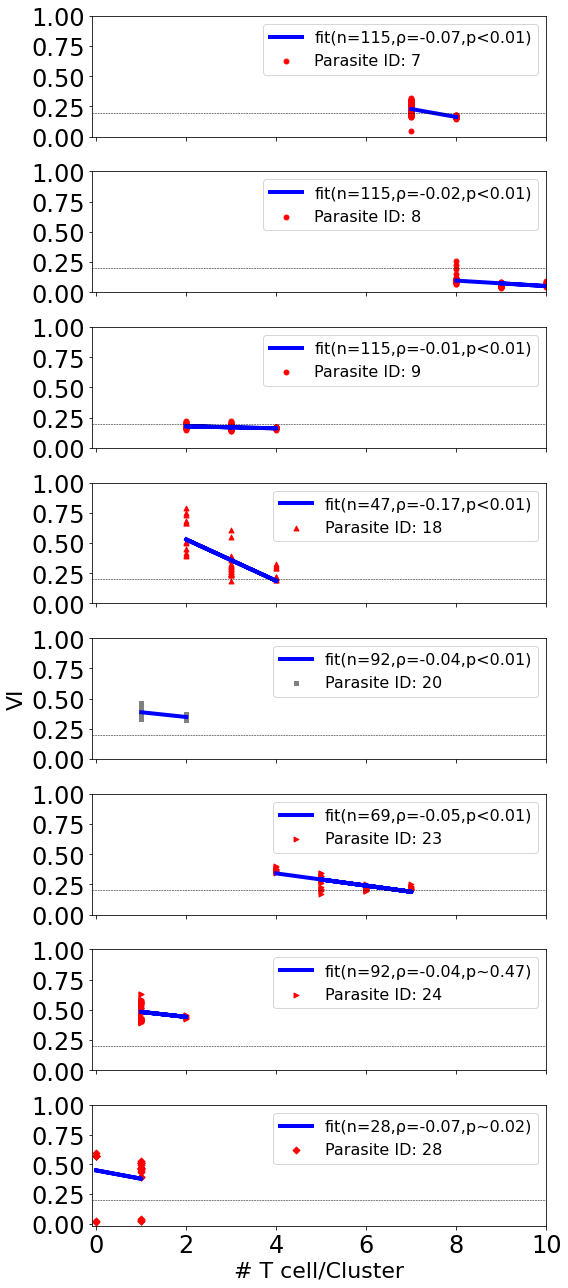

In [7]:
import numpy as np
import matplotlib
import statsmodels.api as sm
from scipy import stats
import scipy.stats
import math
fig,axes = plt.subplots(figsize=(8, 18),nrows=8, ncols=1, sharex=True)
for ax,i in zip(axes.flat,[6,7,8,17,19,22,23,27]):
#for ax,i in zip(axes.flat,range(32)):
    p=0
    q=0
    #lt.plot(df2[i]['Time from T transfer (min)'], df2[i]['Original Parasite Intensity'])
    #plt.plot(df2[i]['Time'],np.log10(df2[i]['Intensity']))
    from sklearn import linear_model
    regr = linear_model.LinearRegression()
    #X = df2[i].time_scaled.values.reshape(-1,1)
    #y = df2[i].Intensity_scale1.values.reshape(-1,1)
    y = df2[i].VI_Index.values.reshape(-1,1)
    X = df2[i].Tcells.values.reshape(-1,1)
    model=regr.fit(X, y)
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())
    # fit our model to the data
#model.fit(x[:, np.newaxis], y)

# and let's plot what this relationship looks like 
    xfit = X
    yfit = regr.predict(X)
    t=i+1
    P = df2[i].VI_Index.values
    n=len(P)
    Q = df2[i].Tcells.values
    r1, p1 = scipy.stats.spearmanr(P, Q)
    r = regr.coef_[0]
    ro = regr.intercept_
    if i == 6 or i == 7 or i== 8:
        ax.scatter(X, y,color='red',marker = 'o', s =24,label = 'Parasite ID: %i'%(t))
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p<0.01)'%(n,r))
    elif i == 17:
        ax.scatter(X, y,color='red',marker = '^', s =24,label = 'Parasite ID: %i'%t)
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p<0.01)'%(n,r))
    elif i == 19:
        ax.scatter(X, y,color='grey',marker = 's', s =24,label = 'Parasite ID: %i'%t)
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p<0.01)'%(n,r))
    elif i== 23:
        ax.scatter(X, y,color='red',marker = '>', s =24,label = 'Parasite ID: %i'%t)
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p~%0.2f)'%(n,r,p1))    
    elif i== 22:
        ax.scatter(X, y,color='red',marker = '>', s =24,label = 'Parasite ID: %i'%t)
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p<0.01)'%(n,r))
    else:
        ax.scatter(X, y,color='red',marker = 'D', s =24,label = 'Parasite ID: %i'%t)
        ax.plot(xfit, yfit, color = 'blue', linewidth = 4,label='fit(n=%i,\u03C1=%0.2f,p~%0.2f)'%(n,r,p1))
    ax.legend(loc='upper right', prop={'size': 16})
    ax.set_yticks([0,0.25,0.5,0.75,1])
    ax.set_xlim([-0.1,10])
    #ax.set_ylim([0.05,0.9])
    p = regr.coef_[0]
    q = regr.intercept_
    t=i+1
    #ax.text(1,0.75, 'Parasite Id:%i'%t, fontsize=20)
    #ax.text(0.42,8, 'coefficient:%0.2f'%p, fontsize=24)
    #ax.text(0.42,7,'Intercept:%0.2f'%q, fontsize=24)
    ax.tick_params(labelsize=24)
    ax.tick_params(labelsize=24)
    ax.axhline(y=0.2, color='k', linestyle='--', alpha=1, linewidth=0.5)
    if i==19:
        ax.set_ylabel('VI', fontsize=22)
    if i==27:
        ax.set_xlabel('# T cell/Cluster', fontsize=22)
    #plt.show()
    #print(i)
    print(regr.coef_[0])
    print(regr.intercept_)
    t=0
    r_sq = model.score(X,y)
    print(r_sq)
fig.tight_layout()
fig.savefig('/Users/soumenbera/Documents/regression-VI-mouse-wise-id.png', format='png', dpi=300)

In [12]:
 np.mean(df2[1].Tcells.values)==0

True

Parasite Id: 1, Spearman correlation: -0.8695498404643832
Parasite Id: 2, Spearman correlation: -0.06719717064544652
Parasite Id: 3, Spearman correlation: -0.3338638373121132
Parasite Id: 4, Spearman correlation: -0.24673816937685006
Parasite Id: 5, Spearman correlation: 0.17442817053011958
Parasite Id: 6, Spearman correlation: 0.6560772036570874
Parasite Id: 7, Spearman correlation: -0.9365717205331106
Parasite Id: 8, Spearman correlation: -0.6609721455061943
Parasite Id: 9, Spearman correlation: -0.628643572950367
Parasite Id: 10, Spearman correlation: 0.852104532839963
Parasite Id: 11, Spearman correlation: 0.2807666735294839
Parasite Id: 12, Spearman correlation: 0.7589037927844589
Parasite Id: 13, Spearman correlation: 0.23485198889916745
Parasite Id: 14, Spearman correlation: -0.7296484736355227
Parasite Id: 15, Spearman correlation: 0.5250925069380205
Parasite Id: 16, Spearman correlation: -0.5496068455134135
Parasite Id: 17, Spearman correlation: -0.8529139685476412
Parasite Id

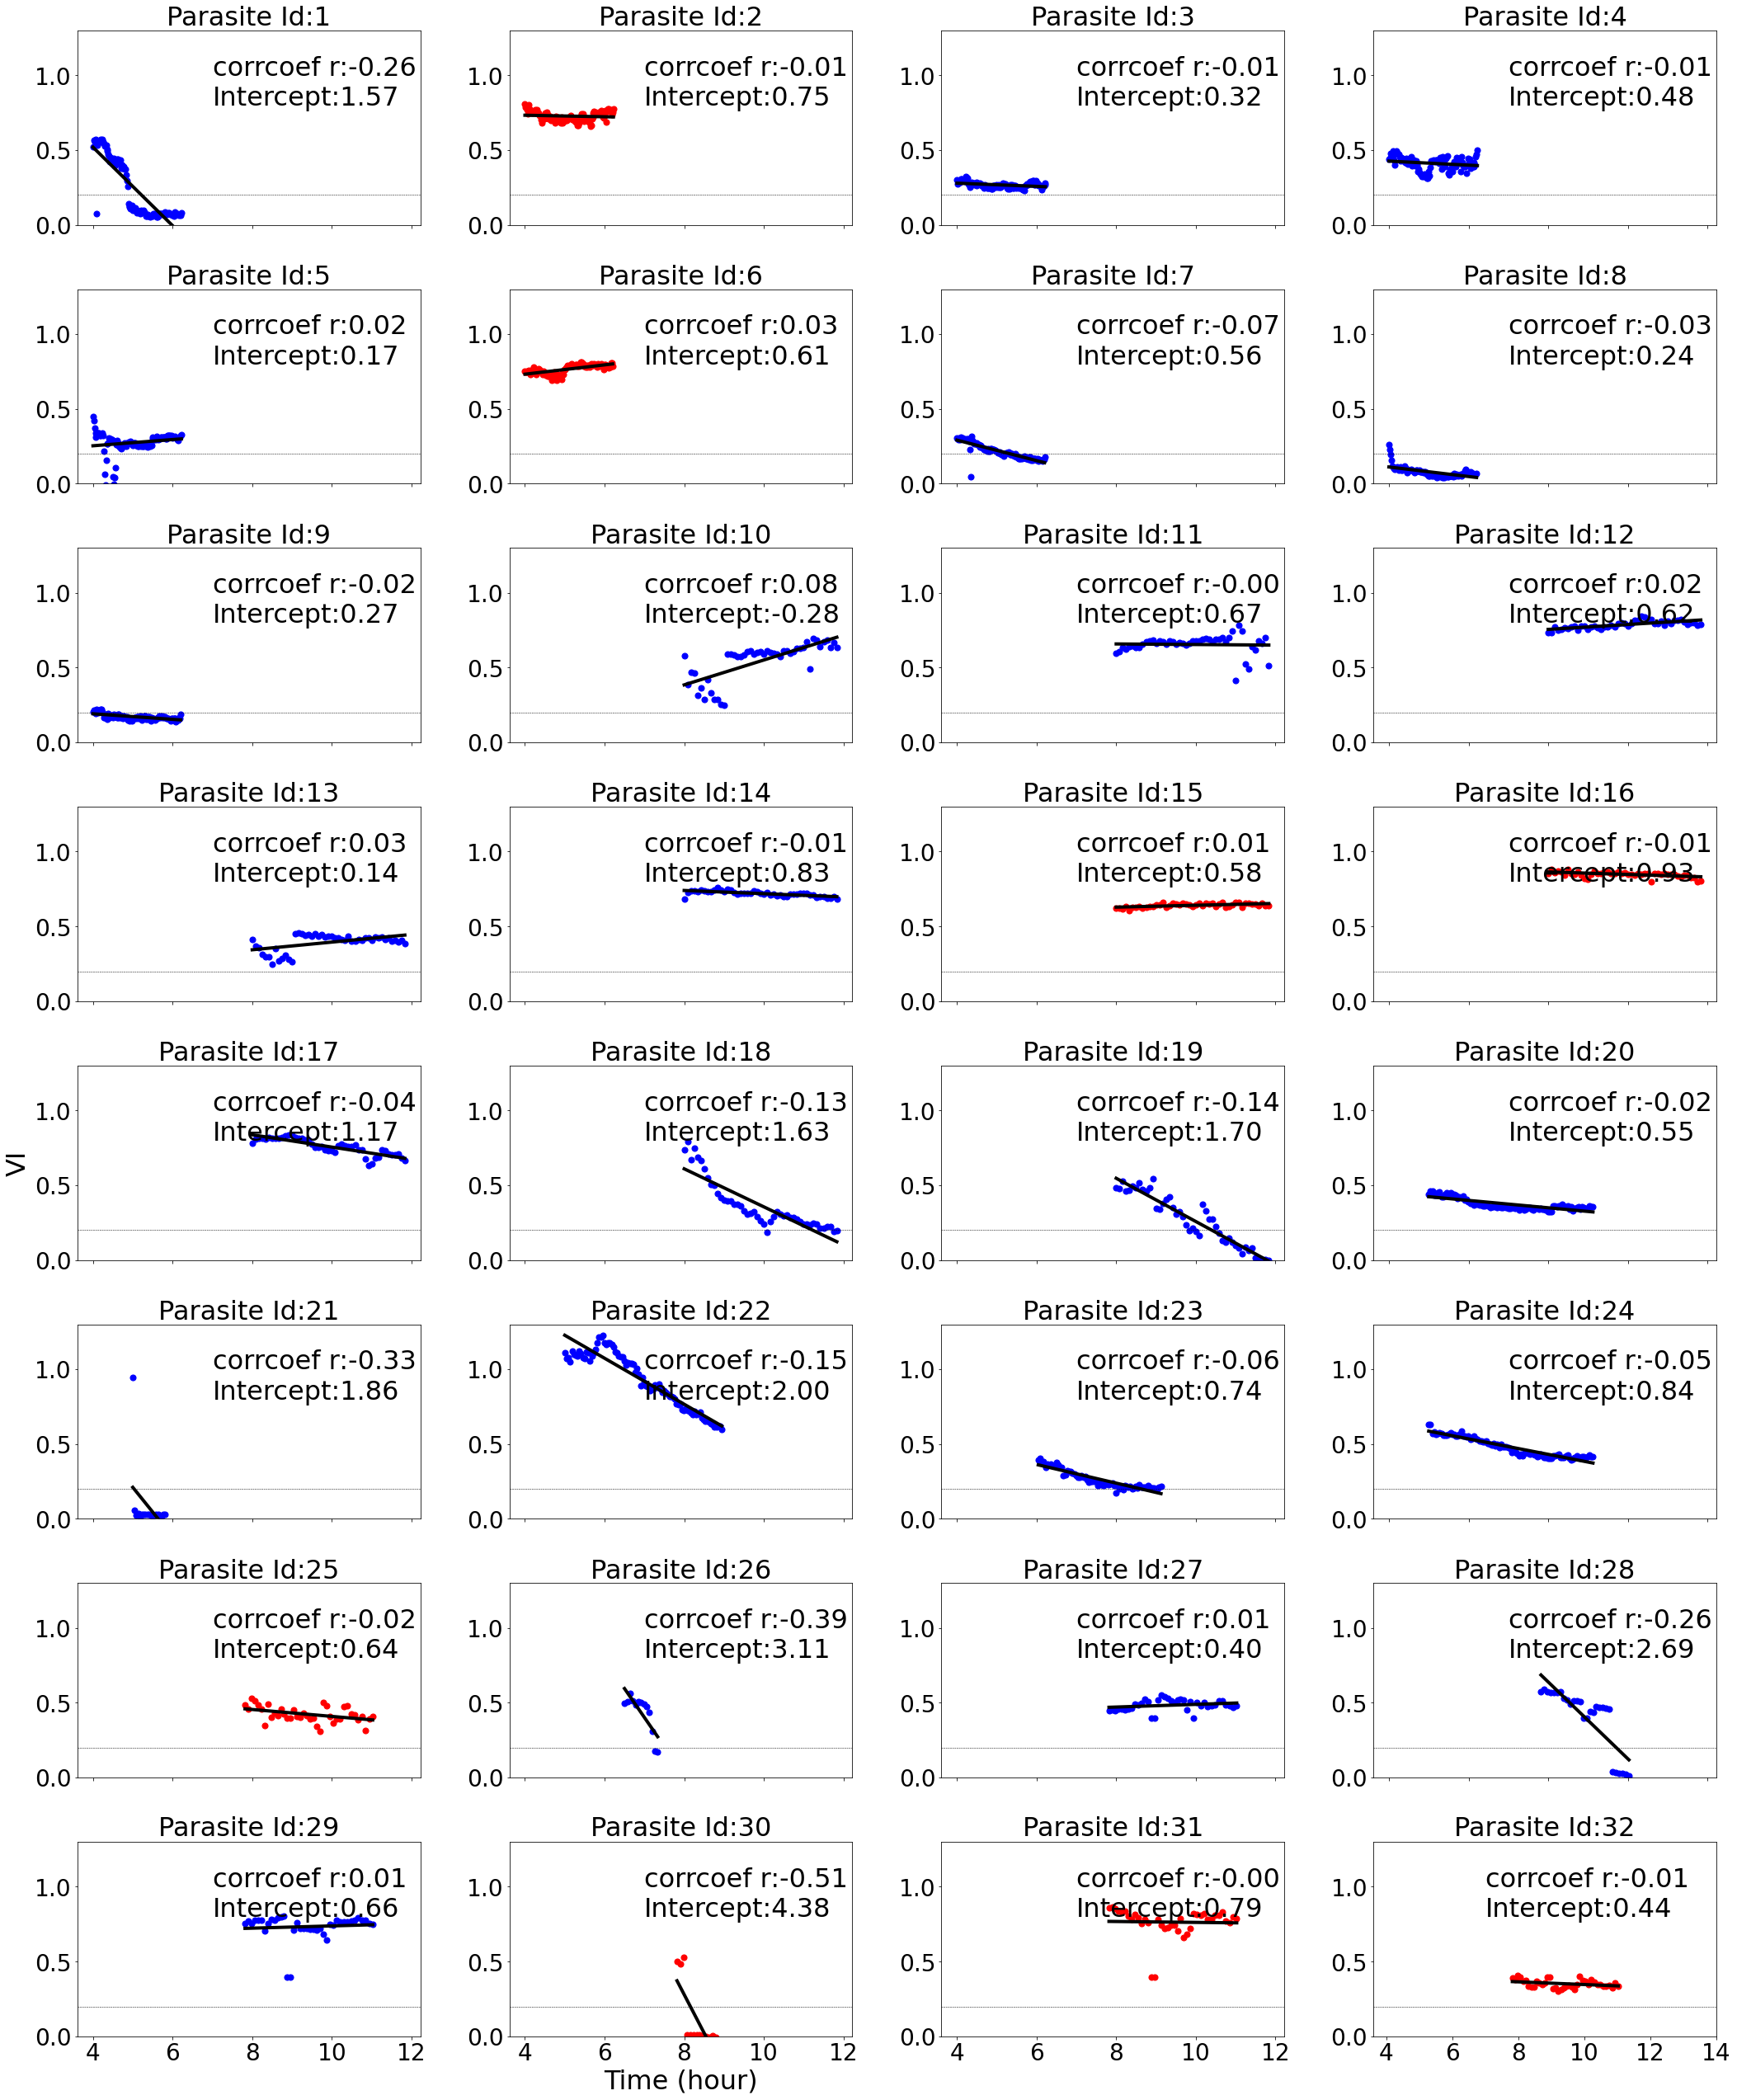

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from sklearn import linear_model

# Set the size and layout of the figure
fig, axes = plt.subplots(figsize=(30, 36), nrows=8, ncols=4, sharex=True)

xticks = [4,6,8,10,12,14]  # Define xticks

for ax, i in zip(axes.flat, range(32)):
    X = df2[i].Time_1.values.reshape(-1,1)
    y = df2[i].VI_Index.values.reshape(-1,1)

    # Skip if there is no data
    if len(X) == 0 or len(y) == 0:
        continue

    # Train linear regression model
    regr = linear_model.LinearRegression()
    model=regr.fit(X, y)
    xfit = X
    yfit = regr.predict(X)
    
    # Set color according to Tcells value
    color = 'red' if np.mean(df2[i].Tcells.values) == 0.000000 else 'blue'
    ax.scatter(X, y, color=color, marker = 'o', s=50)
    ax.plot(xfit, yfit, color = 'black', linewidth = 4)

    # Set plot details
    ax.set_ylim([0,1.3])
    ax.set_xticks(xticks)
    ax.set_title('Parasite Id:{}'.format(i+1), fontsize=32)
    
    # Get and display regression details
    p = regr.coef_[0]
    q = regr.intercept_
    ax.text(7,1.0, 'corrcoef r:%0.2f'%p, fontsize=32)
    ax.text(7,0.8,'Intercept:%0.2f'%q, fontsize=32)

    ax.tick_params(axis='both', which='major', labelsize=28)

    ax.axhline(y=0.2, color='k', linestyle='--', alpha=1, linewidth=0.5)

    if i==16:
        ax.set_ylabel('VI', fontsize=32)

    if i==29:
        ax.set_xlabel('Time (hour)', fontsize=32)

    # Calculate and print Spearman correlation
    P = df2[i].Time_1.values
    Q = df2[i].VI_Index.values
    r1, p1 = scipy.stats.spearmanr(P, Q)
    print(f"Parasite Id: {i+1}, Spearman correlation: {r1}")

# Apply tight_layout to improve subplot aesthetics
fig.tight_layout(pad=3.0)

# Save the figure
fig.savefig('regression-VI-Time_S2.pdf', format='pdf', bbox_inches='tight', dpi=300)


Parasite Id: 1, Spearman correlation: -0.8695498404643832
Parasite Id: 2, Spearman correlation: -0.06719717064544652
Parasite Id: 3, Spearman correlation: -0.3338638373121132
Parasite Id: 4, Spearman correlation: -0.24673816937685006
Parasite Id: 5, Spearman correlation: 0.17442817053011958
Parasite Id: 6, Spearman correlation: 0.6560772036570874
Parasite Id: 7, Spearman correlation: -0.9365717205331106
Parasite Id: 8, Spearman correlation: -0.6609721455061943
Parasite Id: 9, Spearman correlation: -0.628643572950367
Parasite Id: 10, Spearman correlation: 0.852104532839963
Parasite Id: 11, Spearman correlation: 0.2807666735294839
Parasite Id: 12, Spearman correlation: 0.7589037927844589
Parasite Id: 13, Spearman correlation: 0.23485198889916745
Parasite Id: 14, Spearman correlation: -0.7296484736355227
Parasite Id: 15, Spearman correlation: 0.5250925069380205
Parasite Id: 16, Spearman correlation: -0.5496068455134135
Parasite Id: 17, Spearman correlation: -0.8529139685476412
Parasite Id

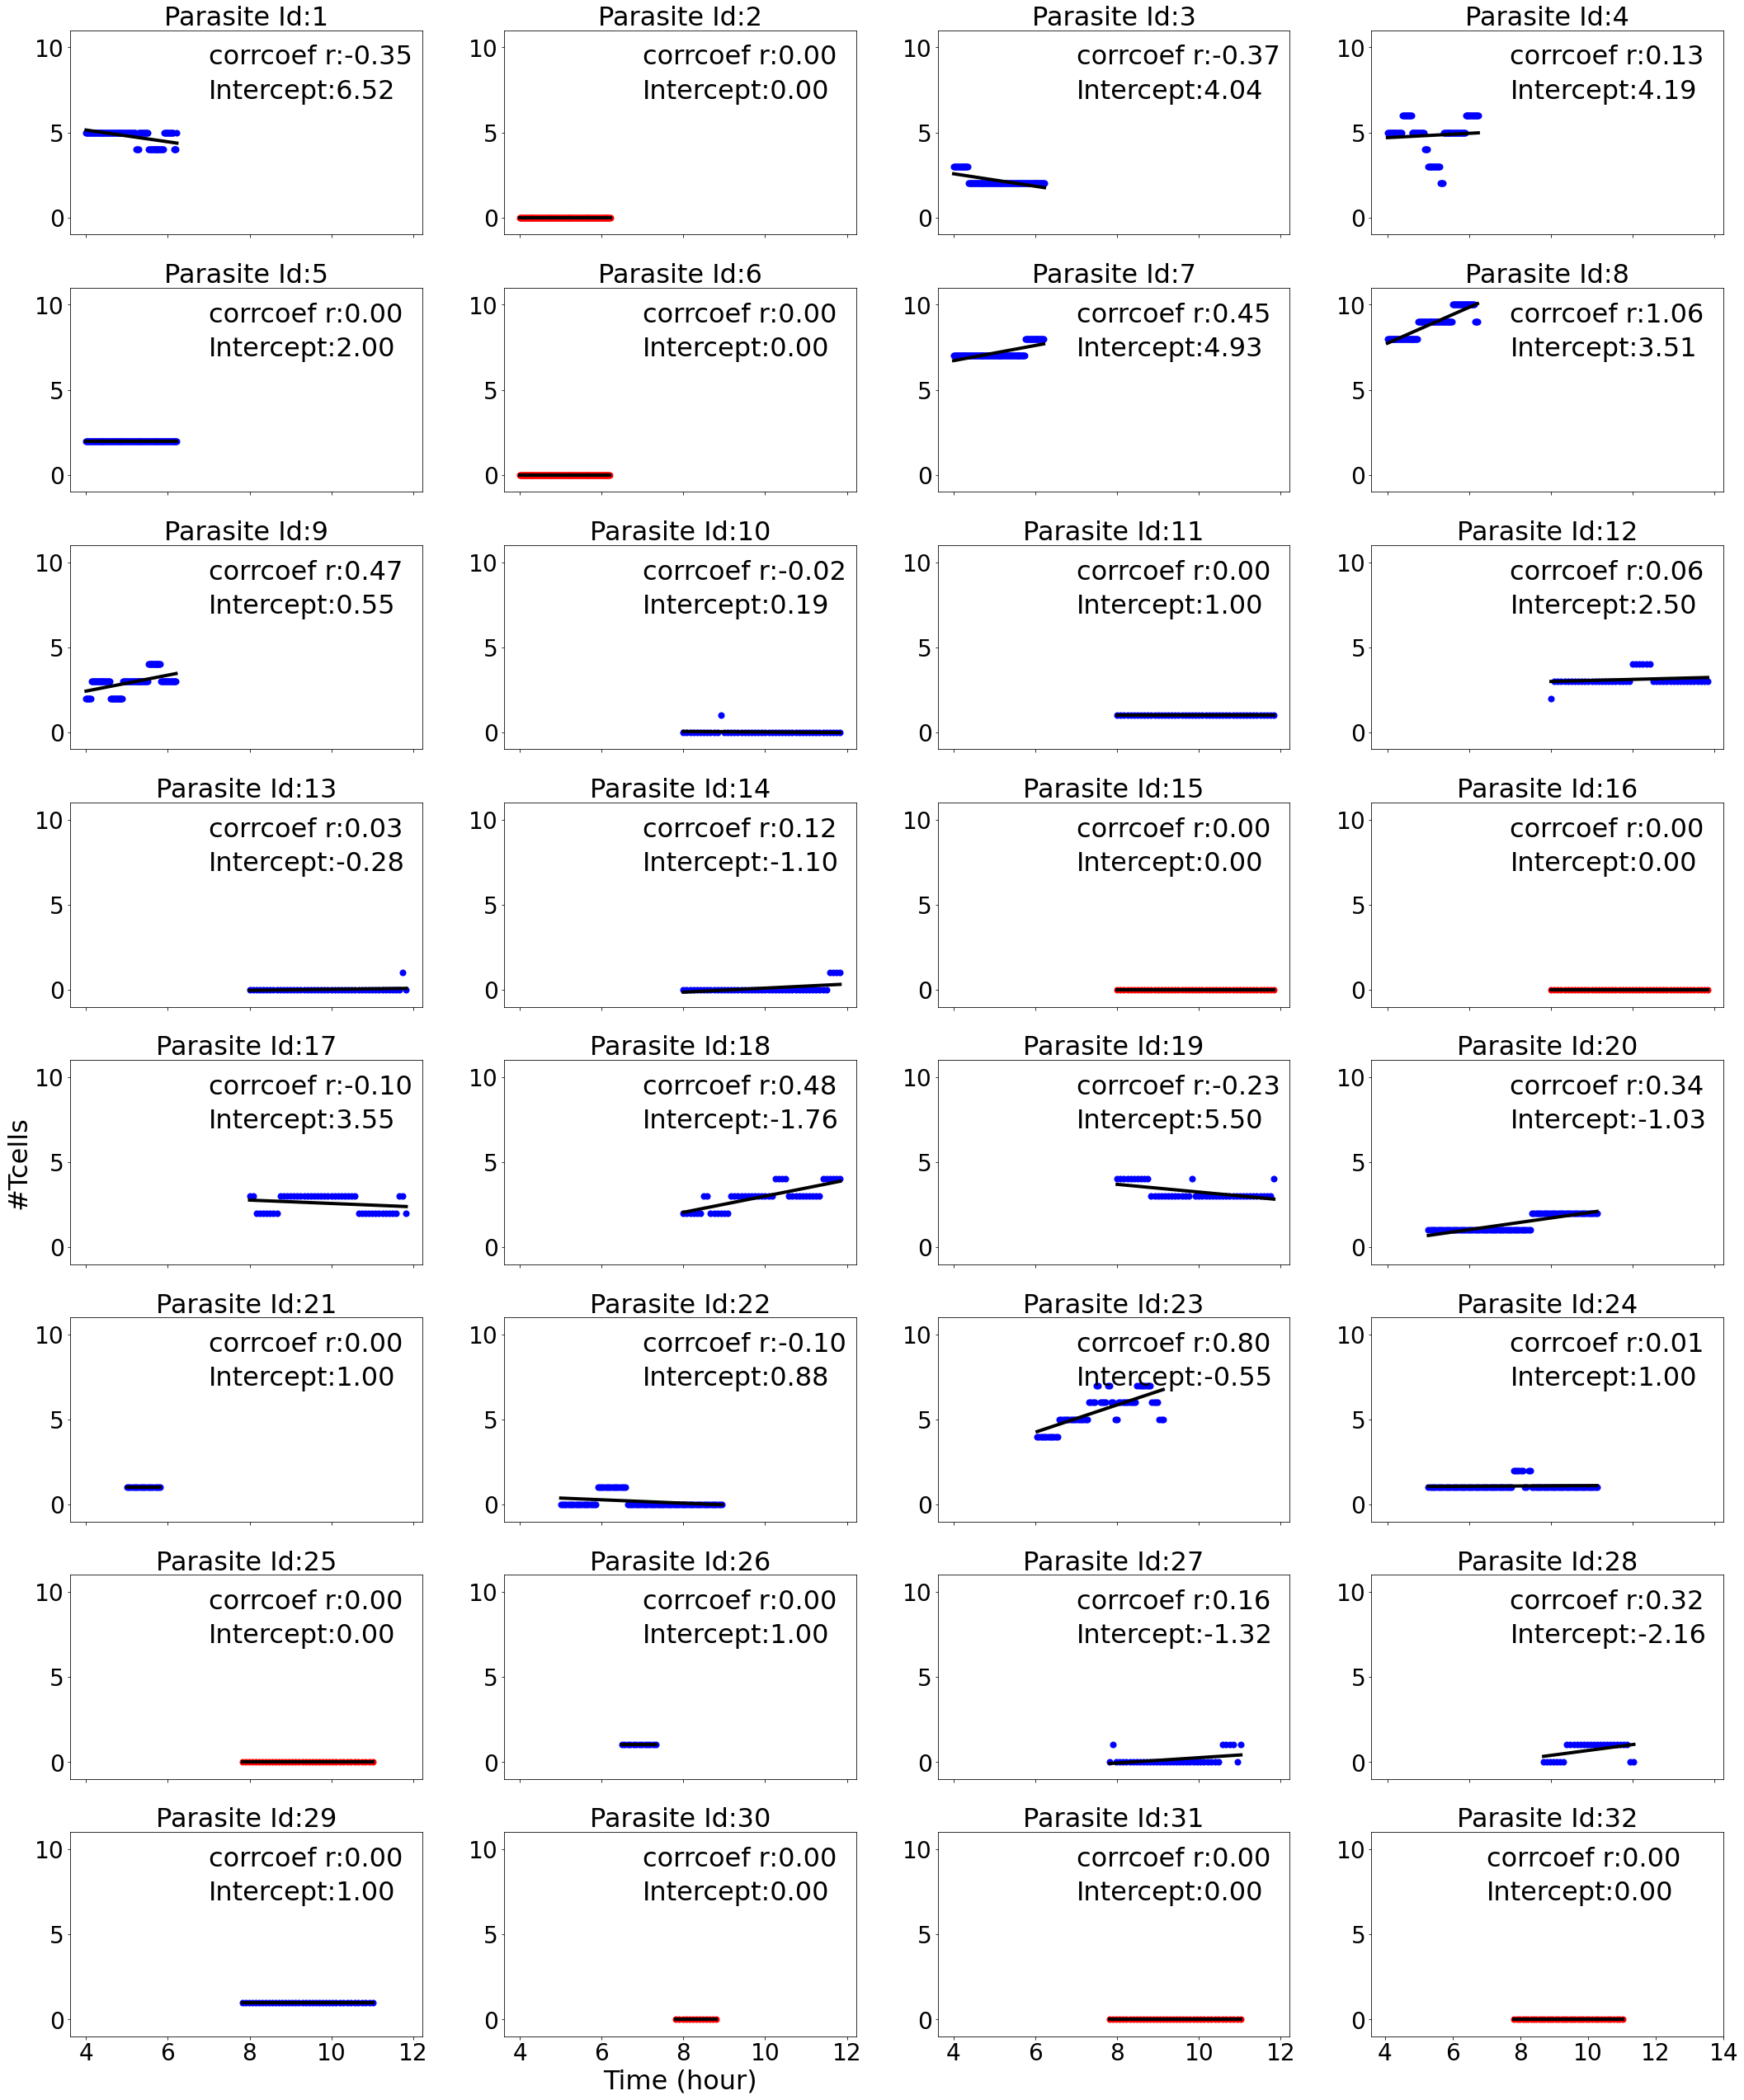

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from sklearn import linear_model

# Set the size and layout of the figure
fig, axes = plt.subplots(figsize=(30, 36), nrows=8, ncols=4, sharex=True)

xticks = [4,6,8,10,12,14]  # Define xticks

for ax, i in zip(axes.flat, range(32)):
    X = df2[i].Time_1.values.reshape(-1,1)
    y = df2[i].Tcells.values.reshape(-1,1)

    # Skip if there is no data
    if len(X) == 0 or len(y) == 0:
        continue

    # Train linear regression model
    regr = linear_model.LinearRegression()
    model=regr.fit(X, y)
    xfit = X
    yfit = regr.predict(X)
    
    # Set color according to Tcells value
    color = 'red' if np.mean(df2[i].Tcells.values) == 0.000000 else 'blue'
    ax.scatter(X, y, color=color, marker = 'o', s=50)
    ax.plot(xfit, yfit, color = 'black', linewidth = 4)

    # Set plot details
    ax.set_ylim([-1,11])
    ax.set_xticks(xticks)
    ax.set_title('Parasite Id:{}'.format(i+1), fontsize=32)
    
    # Get and display regression details
    p = regr.coef_[0]
    q = regr.intercept_
    ax.text(7,9.0, 'corrcoef r:%0.2f'%p, fontsize=32)
    ax.text(7,7.0,'Intercept:%0.2f'%q, fontsize=32)

    ax.tick_params(axis='both', which='major', labelsize=28)

    #ax.axhline(y=0.2, color='k', linestyle='--', alpha=1, linewidth=0.5)

    if i==16:
        ax.set_ylabel('#Tcells', fontsize=32)

    if i==29:
        ax.set_xlabel('Time (hour)', fontsize=32)

    # Calculate and print Spearman correlation
    P = df2[i].Time_1.values
    Q = df2[i].VI_Index.values
    r1, p1 = scipy.stats.spearmanr(P, Q)
    print(f"Parasite Id: {i+1}, Spearman correlation: {r1}")

# Apply tight_layout to improve subplot aesthetics
fig.tight_layout(pad=3.0)

# Save the figure
fig.savefig('regression-Tcell-Time_S4.pdf', format='pdf', bbox_inches='tight', dpi=300)